## 1- Importando a base de dados

In [1]:
#  Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date

 - Link do site onde encontra-se o dataset
 
 url:https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
# visualizando as 5 primeiras linhas do dataset
df[0:5]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,222243929,12/25/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,40,0,25-44,M,BLACK,1007453,233952,40.808798,-73.916184,POINT (-73.91618413199996 40.80879780500004)
1,222115778,12/22/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,33,0,18-24,M,BLACK HISPANIC,1001456,247485,40.845956,-73.937813,POINT (-73.93781267199995 40.84595574000008)
2,222090516,12/21/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,106,0,25-44,M,BLACK,1028605,187930,40.682398,-73.840079,POINT (-73.84007936899997 40.68239828900005)
3,221653577,12/10/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,103,0,18-24,M,BLACK,1039602,190480,40.689336,-73.800409,POINT (-73.80040882999998 40.68933550400004)
4,221599602,12/09/2020,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,S,120,0,18-24,M,BLACK,949767,170539,40.634708,-74.124241,POINT (-74.12424111699994 40.634707811000055)


## 2- Preparaçao dos dados


 - Removendo as colunas que nao serão utilizadas 

In [4]:
dados=df.drop(['ARREST_KEY', 'PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE','ARREST_PRECINCT', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD','New Georeferenced Column'], axis=1)

In [5]:
#  Renomeando as colunas

dados.columns = ['data_da_ocorrencia','descricao_da_ofensa','nivel_da_ofensa','bairro'
                     ,'idade_do_infrator','sexo_do_infrator','raca_do_infrator','latitude','longitude']

In [6]:
# reorganizando os dados referentes a data 

def date_to_weekday(date):
    weekday_dict = {0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    date_time_obj = datetime.datetime.strptime(date, '%m/%d/%Y')
    return weekday_dict[date_time_obj.weekday()]

date = dados['data_da_ocorrencia'].str.split("/", n = 3, expand = True)
dados['ano'] = date[2].astype('int32')
dados['dia'] = date[1].astype('int32')
dados['mes'] = date[0].astype('int32')
dados['dia_da_semana'] = dados['data_da_ocorrencia'].apply(date_to_weekday)

# alterando os dados da coluna nivel_da_ofensa

new_nivel_da_ofensa = {'M': "contravencao", 'F': "crime", 'V': "violacao",'I':"outro" }
dados['nivel_da_ofensa'] = dados['nivel_da_ofensa'].map(new_nivel_da_ofensa)

# alterando os dados da coluna bairro

new_bairro = {'B': 'Bronx', 'S': 'Staten_Island', 'K': 'Brooklyn', 'M': 'Manhattan' , 'Q': 'Queens' }
dados['bairro'] = dados['bairro'].map(new_bairro)

In [7]:
dados.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana
0,12/25/2020,FELONY ASSAULT,crime,Bronx,25-44,M,BLACK,40.808798,-73.916184,2020,25,12,Friday
1,12/22/2020,ROBBERY,crime,Manhattan,18-24,M,BLACK HISPANIC,40.845956,-73.937813,2020,22,12,Tuesday
2,12/21/2020,FELONY ASSAULT,crime,Queens,25-44,M,BLACK,40.682398,-73.840079,2020,21,12,Monday
3,12/10/2020,FELONY ASSAULT,crime,Queens,18-24,M,BLACK,40.689336,-73.800409,2020,10,12,Thursday
4,12/09/2020,FORGERY,crime,Staten_Island,18-24,M,BLACK,40.634708,-74.124241,2020,9,12,Wednesday


 - Convertendo a coluna " DATA_DA_OCORRENCIA "para formato datetime

In [8]:
dados["data_da_ocorrencia"] = pd.to_datetime(dados["data_da_ocorrencia"] )

## 3.1 Preparação dos Dados para modelagem
- Separação Treino/Teste
- Separar Dados de Entrada (Atributos) e de saída (target)
- Tratar colunas categóricas
- Tratar dados ausentes


## Criando um modelo de classificacao pra definir o sexo de quem praticou o delito.

 - Selecionando apenas os delitos mais recorrentes

In [9]:
# dados = dados.query('descricao_da_ofensa =="ASSAULT 3 & RELATED OFFENSES" or  descricao_da_ofensa =="FELONY ASSAULT" or descricao_da_ofensa =="PETIT LARCENY" or descricao_da_ofensa =="DANGEROUS DRUGS" or descricao_da_ofensa =="MISCELLANEOUS PENAL LAW" or descricao_da_ofensa =="ROBBERY" or descricao_da_ofensa =="CRIMINAL MISCHIEF & RELATED OF" or descricao_da_ofensa =="BURGLARY" or  descricao_da_ofensa =="GRAND LARCENY" or descricao_da_ofensa =="DANGEROUS WEAPONS" or  descricao_da_ofensa =="OFFENSES AGAINST PUBLIC ADMINI" or descricao_da_ofensa =="VEHICLE AND TRAFFIC LAWS" or  descricao_da_ofensa =="OFF. AGNST PUB ORD SENSBLTY &" or descricao_da_ofensa =="SEX CRIMES" or descricao_da_ofensa =="INTOXICATED & IMPAIRED DRIVING"  ')

 - Verificando a exitência de dados ausentes>

In [10]:
dados.isna().sum()

data_da_ocorrencia        0
descricao_da_ofensa      37
nivel_da_ofensa        1389
bairro                    0
idade_do_infrator         0
sexo_do_infrator          0
raca_do_infrator          0
latitude                  0
longitude                 0
ano                       0
dia                       0
mes                       0
dia_da_semana             0
dtype: int64

In [11]:
dados = dados.dropna()

In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138987 entries, 0 to 140412
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   data_da_ocorrencia   138987 non-null  datetime64[ns]
 1   descricao_da_ofensa  138987 non-null  object        
 2   nivel_da_ofensa      138987 non-null  object        
 3   bairro               138987 non-null  object        
 4   idade_do_infrator    138987 non-null  object        
 5   sexo_do_infrator     138987 non-null  object        
 6   raca_do_infrator     138987 non-null  object        
 7   latitude             138987 non-null  float64       
 8   longitude            138987 non-null  float64       
 9   ano                  138987 non-null  int32         
 10  dia                  138987 non-null  int32         
 11  mes                  138987 non-null  int32         
 12  dia_da_semana        138987 non-null  object        
dtypes: datetime64[

 - Excluindo colunas que não serão utilizadas.
 
 Como todos os delitos são referentes ao ano de 2020 , iremos excluir apenas essa coluna.

In [13]:
dados = dados.drop(columns=['ano'])

 - Convertendo variáveis categóricas em variáveis numéricas

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
enconder = LabelEncoder()

In [16]:
dados['data_da_ocorrencia'] = enconder.fit_transform(dados['data_da_ocorrencia'])
dados['nivel_da_ofensa'] = enconder.fit_transform(dados['nivel_da_ofensa'])
dados['idade_do_infrator'] = enconder.fit_transform(dados['idade_do_infrator'])
dados['descricao_da_ofensa'] = enconder.fit_transform(dados['descricao_da_ofensa'])
dados['bairro'] = enconder.fit_transform(dados['bairro'])
dados['sexo_do_infrator'] = enconder.fit_transform(dados['sexo_do_infrator'])
dados['raca_do_infrator'] = enconder.fit_transform(dados['raca_do_infrator'])
dados['mes'] = enconder.fit_transform(dados['mes'])
dados['dia'] = enconder.fit_transform(dados['dia'])
dados['dia_da_semana'] = enconder.fit_transform(dados['dia_da_semana'])
dados['latitude'] = enconder.fit_transform(dados['latitude'])
dados['longitude'] = enconder.fit_transform(dados['longitude'])

In [17]:
dados.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,dia,mes,dia_da_semana
0,359,17,1,0,1,1,2,24042,16044,24,11,0
1,356,54,1,2,0,1,3,27932,12432,21,11,5
2,355,17,1,3,1,1,2,11085,25990,20,11,1
3,344,17,1,3,0,1,2,12223,28212,9,11,4
4,343,18,1,4,0,1,2,4753,980,8,11,6


Separando as variaveis em X e Y

In [19]:
X = dados.drop('sexo_do_infrator',axis=1).values
Y = dados['sexo_do_infrator'].values


Separando em amostras de treino e teste

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0)

 - Aplicando o algoritmo

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf = RandomForestClassifier()
clf.fit(X_treino, Y_treino)

RandomForestClassifier()

In [24]:
score_treino = clf.score(X_treino,Y_treino)
score_treino

0.9910303146584805

In [25]:
score_teste = clf.score(X_teste,Y_teste)
score_teste

0.833741042392149

In [26]:
Y_pred = clf.predict(X_teste)

In [27]:
from sklearn.metrics import confusion_matrix

Text(33.0, 0.5, 'Real ( 1 ou 0)')

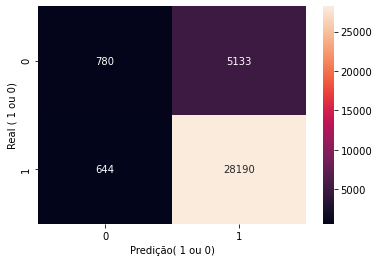

In [28]:
cm=confusion_matrix(Y_teste, Y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
y_proba = clf.predict_proba(X_teste)
roc_auc_score(Y_teste, y_proba[:, 1])

Aplicando GridSearchCV para determinar os melhores parâmetros do modelo

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
criterion=['gini','entropy']
max_depth = np.arange(2,10)
max_features= np.arange(2,10)

In [ ]:
parametros = {'criterion' : criterion, 'max_depth' : max_depth, 'max_features' : max_features}

In [ ]:
melhor_modelo = GridSearchCV(clf, parametros, n_jobs=-1, refit = True, cv=2)

In [ ]:
melhor_modelo.fit(X_treino, Y_treino)

In [ ]:
modelo_final = melhor_modelo.best_estimator_

In [ ]:
modelo_final.fit(X_treino, Y_treino)

In [ ]:
Y_previsto = modelo_final.predict(X_teste)

In [ ]:
score_teste = modelo_final.score(X_teste,Y_teste)

In [ ]:
score_teste

In [ ]:
y_proba = modelo_final.predict_proba(X_teste)
roc_auc_score(Y_teste, y_proba[:, 1])